<h1>Telco Customer Churn Prediction</h1>

# Problem Statement: Telco Customer Churn Prediction

A major telecommunications company is facing a significant issue with customer retention. Customers are leaving the company (i.e., churning) at a high rate, which negatively impacts revenue and long-term business growth. The company has collected historical customer data, including demographic information, account details, and service usage patterns.

## Objective

Develop a machine learning model that predicts whether a customer will churn based on their characteristics and service usage data. This predictive model will help the company proactively identify at-risk customers and take targeted actions to improve retention.


<h2>1. Libraries And Data Loading</h2>

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from scipy import stats

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Handling imbalance
from imblearn.over_sampling import SMOTE

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score


df = pd.read_csv('Telco-Customer-Churn.csv')


## 2. Data Overview

- **Dataset**: Telco Customer Churn  
- **Rows**: 7043  
- **Columns**: 21  
- **Objective**: Predict whether a customer will churn (**Yes/No**)  
  - **Yes (1)** →They have left the service.  
  - **No (0)** →They are still an active user of the service.
---


<h2>3. Data Observations & Cleaning (EDA)</h2>

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


---
### Initial Observations

- **Target column**: `Churn` (Yes/No).

- **Feature types**:
  - **Categorical** (e.g., `gender`, `InternetService`, `Contract`)
  - **Numerical** (e.g., `tenure`, `MonthlyCharges`)
  - **Note**: `TotalCharges` is of type **object**, but it should be **numeric** – needs cleaning.
---


In [4]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
for col in df.columns:
    print(col,len(df[df[col]==" "]))
    print("_________________________________________")

gender 0
_________________________________________
SeniorCitizen 0
_________________________________________
Partner 0
_________________________________________
Dependents 0
_________________________________________
tenure 0
_________________________________________
PhoneService 0
_________________________________________
MultipleLines 0
_________________________________________
InternetService 0
_________________________________________
OnlineSecurity 0
_________________________________________
OnlineBackup 0
_________________________________________
DeviceProtection 0
_________________________________________
TechSupport 0
_________________________________________
StreamingTV 0
_________________________________________
StreamingMovies 0
_________________________________________
Contract 0
_________________________________________
PaperlessBilling 0
_________________________________________
PaymentMethod 0
_________________________________________
MonthlyCharges 0
____________________

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [7]:
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)

In [9]:
# Filter the rows where TotalCharges is 0
zero_value_rows = df[df["TotalCharges"] == 0]

# Display the rows
zero_value_rows


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


---
## Findings

- All columns had `0` blank values **except** for `TotalCharges`, which had **11** blank space entries.
- After converting `TotalCharges` to numeric with `errors='coerce'`, the blank values were turned into `NaN`.
- Filled `NaN` values in `TotalCharges` with `0`.
- Identified **11** rows where `TotalCharges == 0`.
- All 11 rows had `tenure = 0`, indicating that these are new customers who have not been billed yet.
- Therefore, these entries with `TotalCharges = 0` are not data errors but valid records for customers with no tenure yet.

---

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<h3>3.1) Numerical Feature Analysis </h3>

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


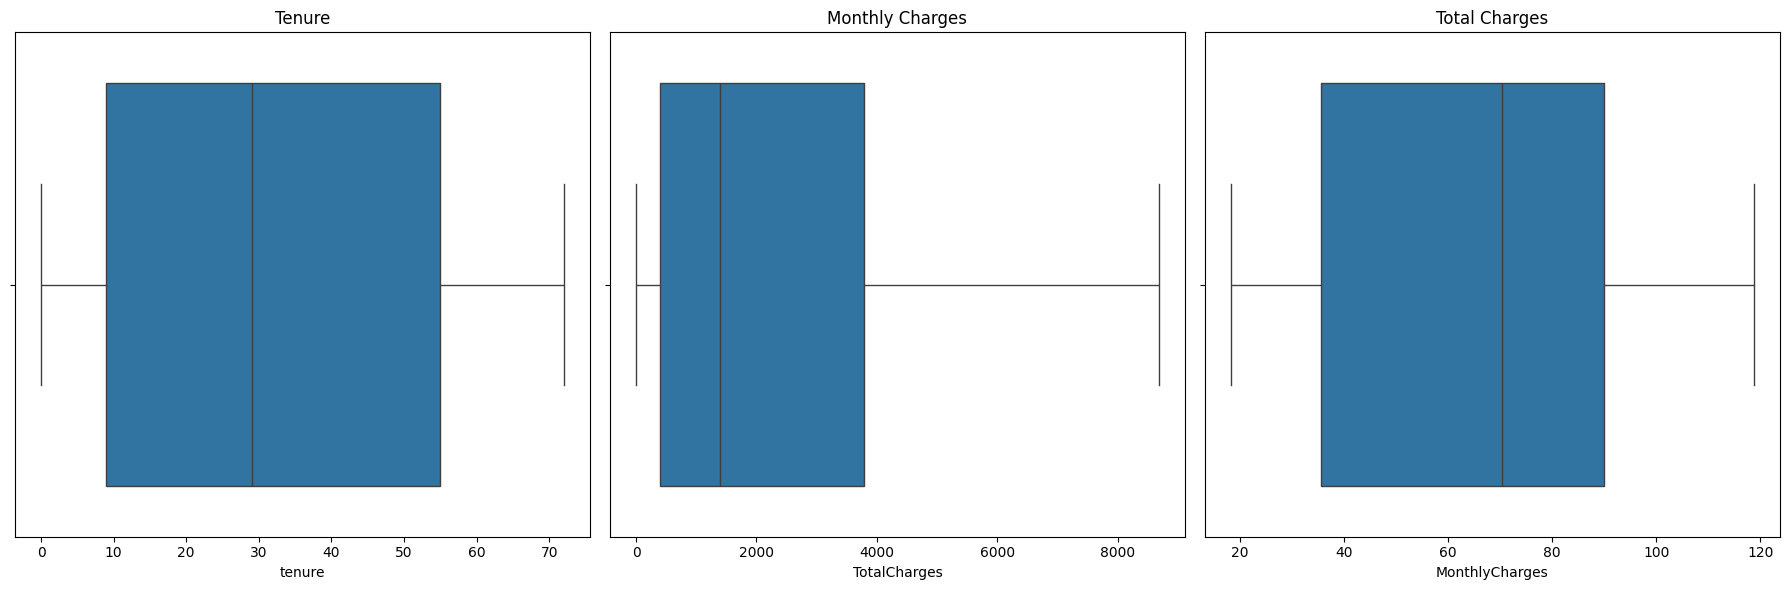

In [12]:
# Set the figure size and layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Plot each boxplot in a subplot
sns.boxplot(x='tenure', data=df, ax=axes[0])
axes[0].set_title('Tenure')

sns.boxplot(x='MonthlyCharges', data=df, ax=axes[2])
axes[1].set_title('Monthly Charges')

sns.boxplot(x='TotalCharges', data=df, ax=axes[1])
axes[2].set_title('Total Charges')

plt.tight_layout()
plt.show()


In [13]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

# Apply to each numerical feature
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    detect_outliers_iqr(df, col)


tenure: 0 outliers
MonthlyCharges: 0 outliers
TotalCharges: 0 outliers


## Findings: Numerical Feature Analysis & Outlier Detection

1. **Descriptive Statistics:**
   - `tenure` ranges from 0 to 72 months, with a median of 29.
   - `MonthlyCharges` has a wide spread, ranging from 18.25 to 118.75.
   - `TotalCharges` ranges from 0 to 8684.80, with a high standard deviation, indicating significant variability in customer billing.

2. **Boxplot Visualization:**
   - Visual inspection of boxplots shows that `tenure`, `MonthlyCharges`, and `TotalCharges` distributions do not show outliers.

3. **Outlier Detection (IQR Method):**
   - No outliers were detected in:
     - `tenure`
     - `MonthlyCharges`
     - `TotalCharges`

---


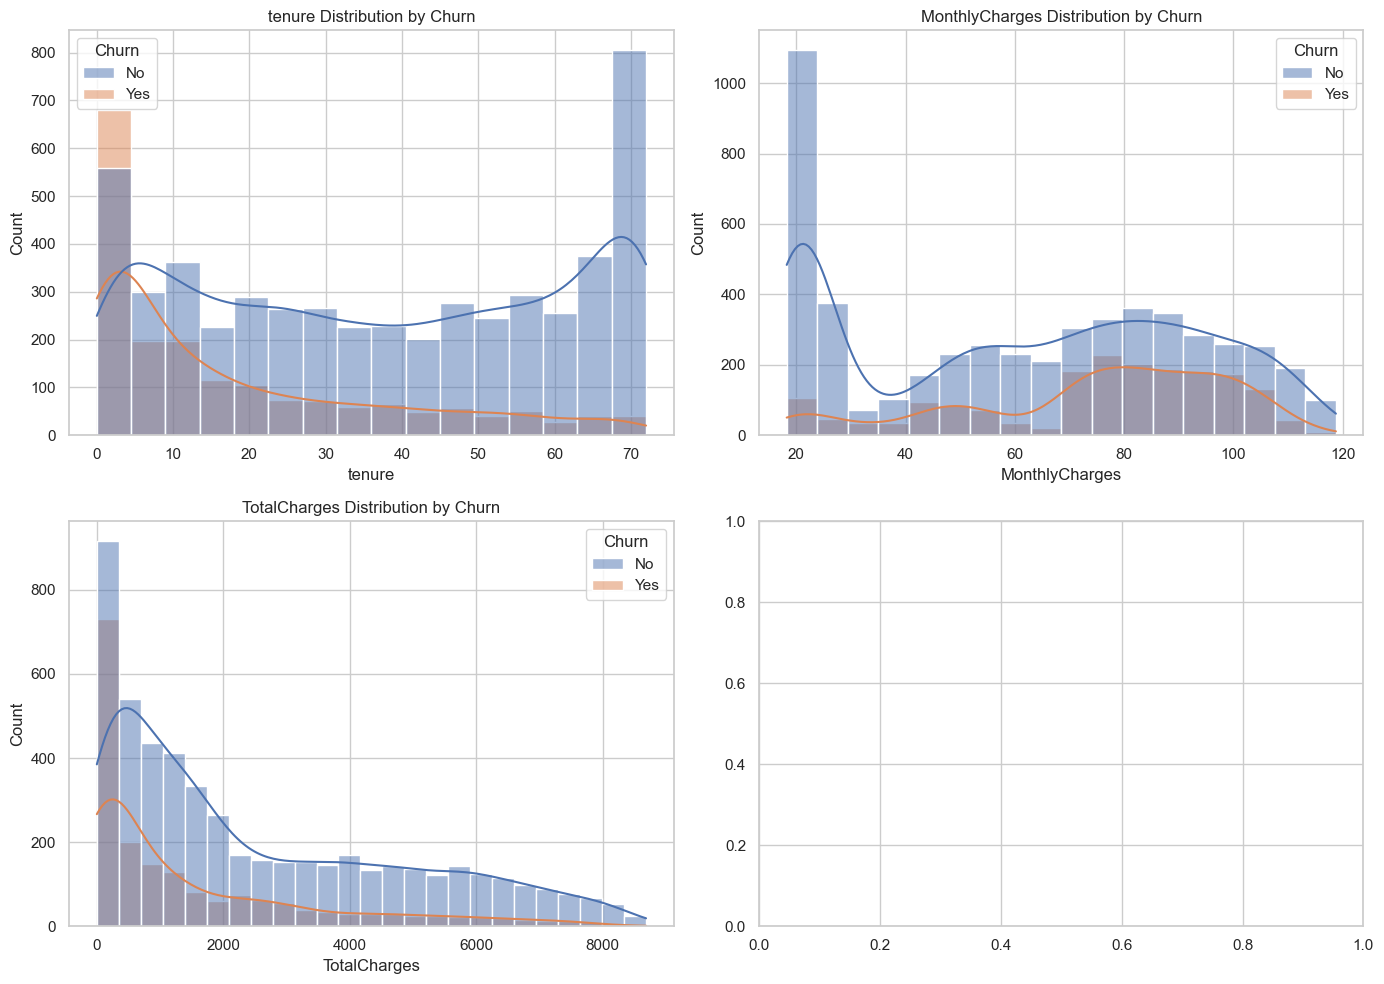

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Separate numerical and target
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]

# Plot distributions of numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    row, col = divmod(i, 2)
    sns.histplot(data=df, x=feature, hue="Churn", kde=True, ax=axes[row][col])
    axes[row][col].set_title(f"{feature} Distribution by Churn")

plt.tight_layout()
plt.show()


### Visual Analysis

#### 1. **Tenure vs Churn**
- Customers with **low tenure** are more likely to churn.
- Longer tenure is associated with customer retention.

#### 2. **Monthly Charges vs Churn**
- Churn is higher among customers with **high monthly charges**.
- Indicates pricing could be a churn driver.

#### 3. **Total Charges vs Churn**
- Churners mostly have **low total charges**, possibly due to short tenure.
- Reinforces the idea that new users are more likely to leave.

---

- **Tenure**, **MonthlyCharges**, and **TotalCharges** show strong patterns with churn.
- Recently joined or low-spending users have a higher churn risk.
- These features may be **important predictors** in the classification model.

---



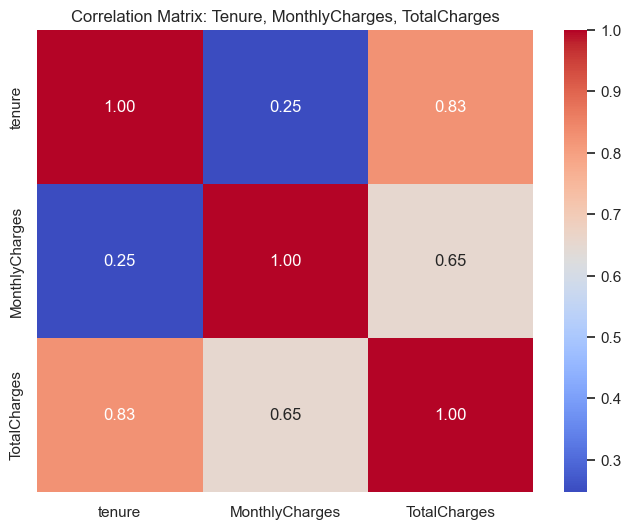

In [15]:
# Select relevant features
corr_features = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Calculate correlation matrix
corr_matrix = corr_features.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix: Tenure, MonthlyCharges, TotalCharges')
plt.show()


<h3>3.2) Categorical  Feature Analysis </h3>

In [16]:
# Check data types and unique values in each column
unique_values = df.nunique()
unique_values


gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

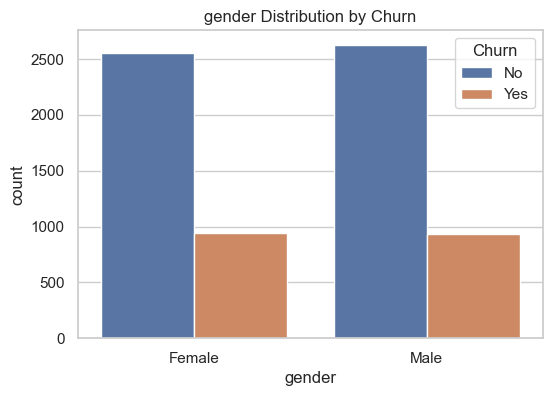

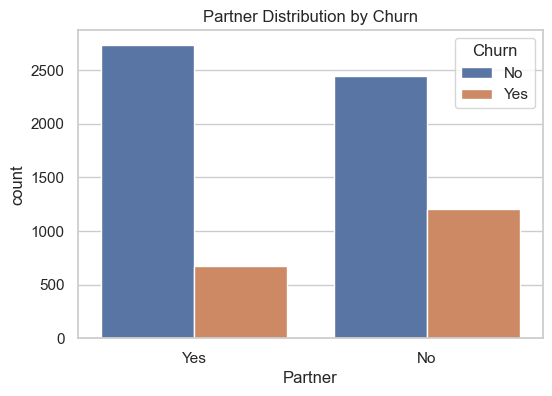

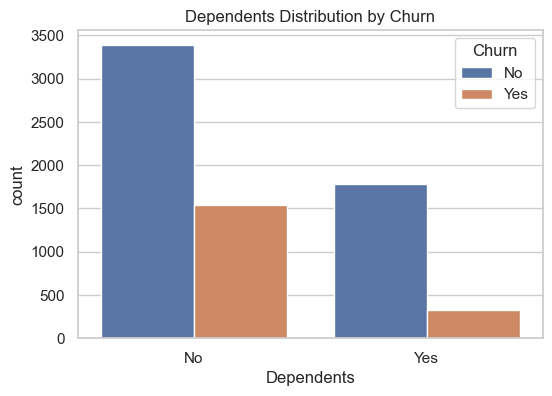

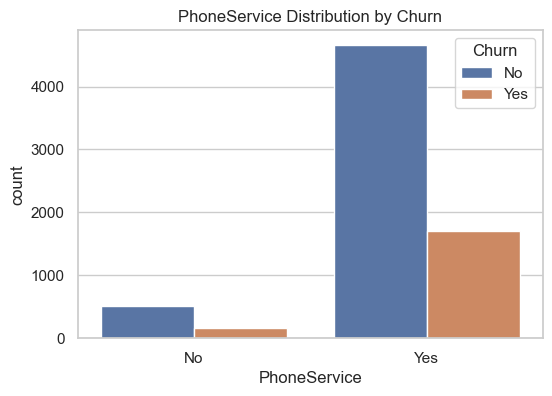

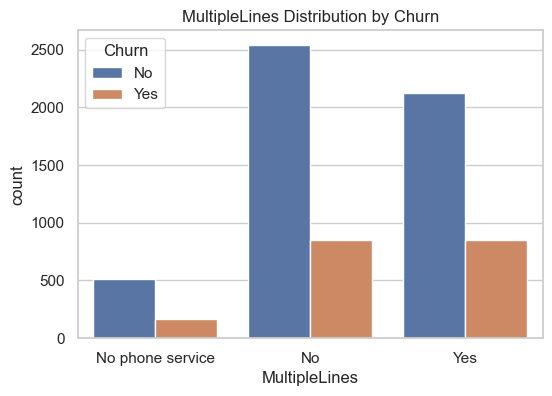

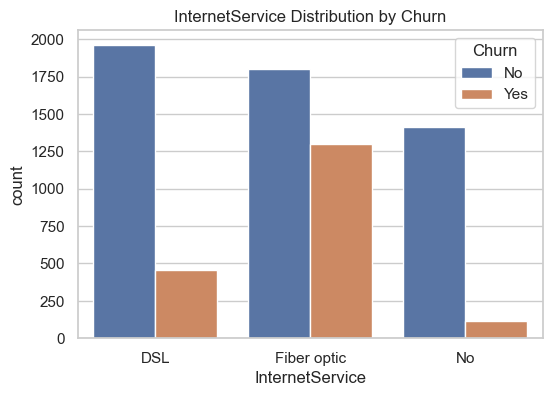

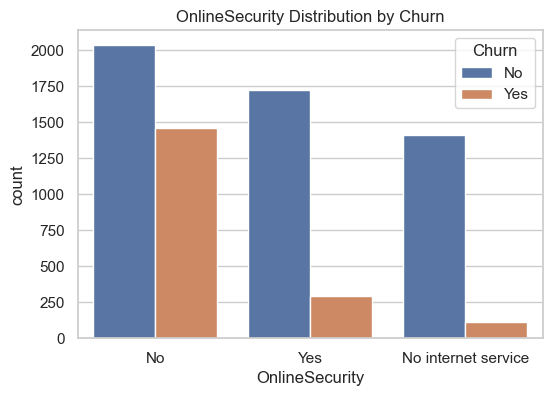

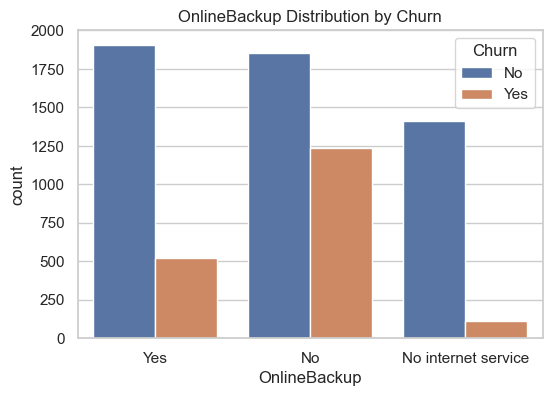

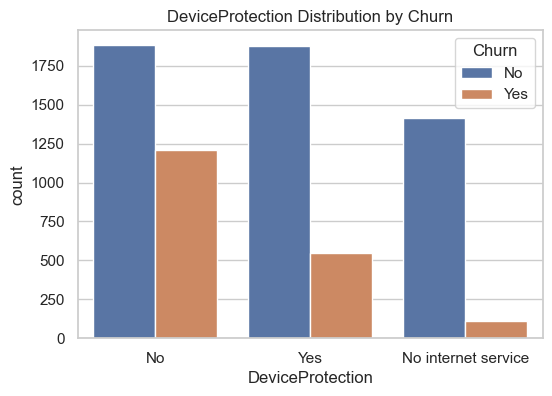

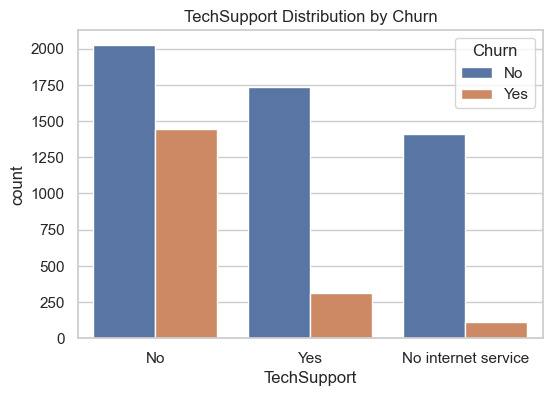

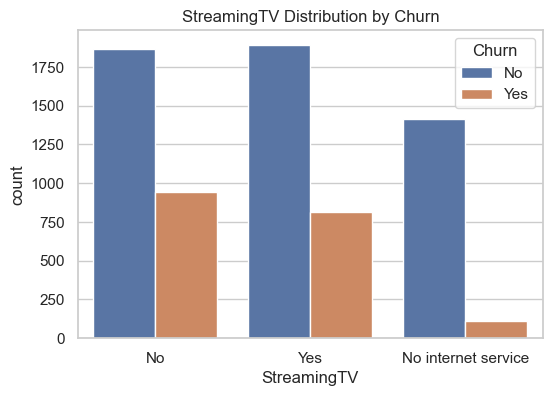

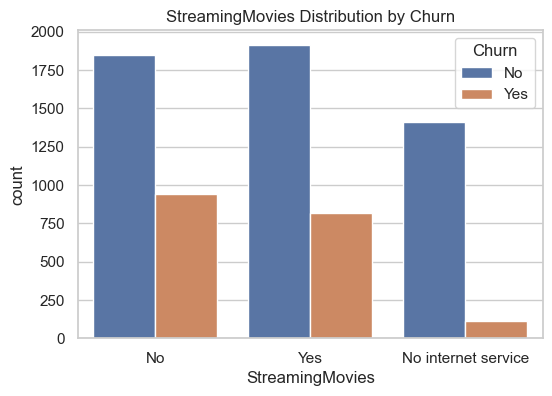

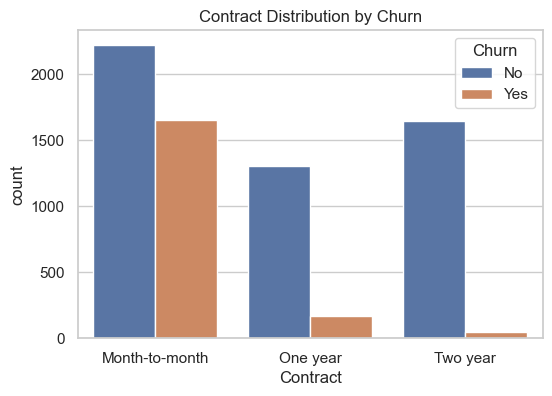

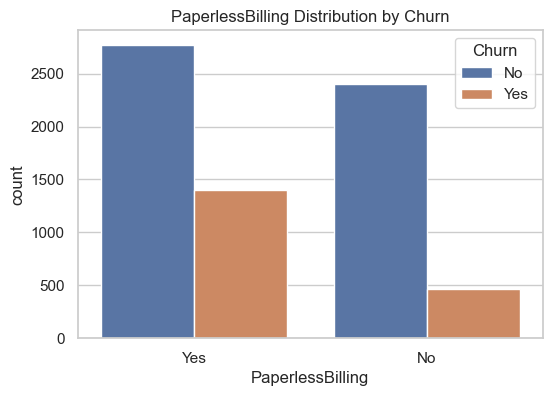

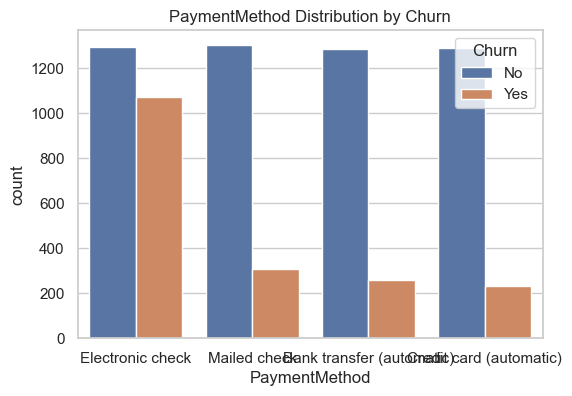

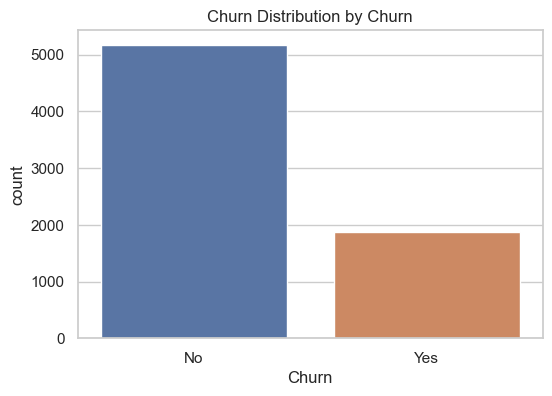

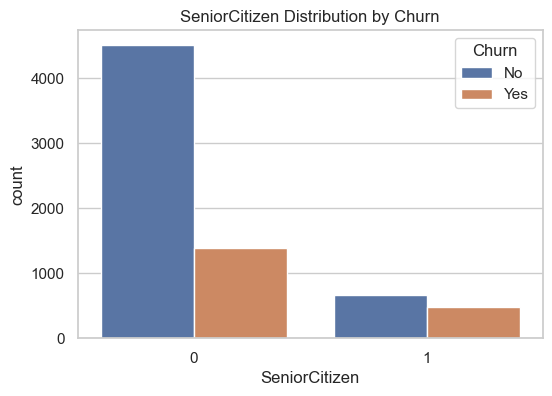

In [17]:
Categorical_cols=df.select_dtypes(include='object').columns.to_list()+['SeniorCitizen']

for col in Categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df,x=col,hue='Churn')
    plt.title(f"{col} Distribution by Churn")
    plt.show()

In [18]:
for col in df.columns:
    if col not in numerical_features:
        print(col,df[col].unique())
        print("_________________________________________")

gender ['Female' 'Male']
_________________________________________
SeniorCitizen [0 1]
_________________________________________
Partner ['Yes' 'No']
_________________________________________
Dependents ['No' 'Yes']
_________________________________________
PhoneService ['No' 'Yes']
_________________________________________
MultipleLines ['No phone service' 'No' 'Yes']
_________________________________________
InternetService ['DSL' 'Fiber optic' 'No']
_________________________________________
OnlineSecurity ['No' 'Yes' 'No internet service']
_________________________________________
OnlineBackup ['Yes' 'No' 'No internet service']
_________________________________________
DeviceProtection ['No' 'Yes' 'No internet service']
_________________________________________
TechSupport ['No' 'Yes' 'No internet service']
_________________________________________
StreamingTV ['No' 'Yes' 'No internet service']
_________________________________________
StreamingMovies ['No' 'Yes' 'No internet servic

### categorical variables Observations:

- All categorical variables (e.g., Gender, SeniorCitizen, Partner, etc.) will be label encoded, converting them into numerical representations for machine learning models.
- Variables like **MultipleLines**, **InternetService**, **OnlineSecurity**, etc., which have 3 possible values, will be label encoded accordingly.
- **PaymentMethod** with 4 unique values will be label encoded into 4 distinct numerical values, representing the different payment methods.
- The **Churn** column, being the target variable for a classification task, will also be label encoded, with values 'Yes' and 'No' transformed into 1 and 0, respectively.


<h2>4. Data Preprocessing</h2>

<h3>4.1) Target Encoding:</h3>

In [19]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

<h3>4.2) Categorical Encoding:</h3>

In [20]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Contract']  # Ordinal (Month-to-month < One year < Two year)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'gender']
other_cats = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']

# Label encode binary and ordinal
for col in binary_cols + label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encode remaining nominal/multi-category
df = pd.get_dummies(df, columns=other_cats)


## Categorical Variables Encoding Summary

### Observations:

All categorical variables will be encoded to make them suitable for machine learning models. A combination of **Label Encoding** and **One-Hot Encoding** is applied based on the number of unique categories and the importance of preserving ordinal relationships.

---

### Label Encoding Applied To:

These variables have two categories, and label encoding is sufficient:

- **Contract** – `'Month-to-month'`, `'One year'`, `'Two year'`
- **gender** – 2 values: `'Female'`, `'Male'`
- **SeniorCitizen** – Already numerical (`0`, `1`)
- **Partner** – 2 values: `'Yes'`, `'No'`
- **Dependents** – 2 values: `'No'`, `'Yes'`
- **PhoneService** – 2 values: `'No'`, `'Yes'`
- **PaperlessBilling** – 2 values: `'Yes'`, `'No'`

> Label encoding converts these values into integers (`0`, `1`).

---

### One-Hot Encoding Applied To:

These variables have **3 or more non-ordinal categories**, and one-hot encoding prevents misleading relationships:

- **MultipleLines** – `'No phone service'`, `'No'`, `'Yes'`
- **InternetService** – `'DSL'`, `'Fiber optic'`, `'No'`
- **OnlineSecurity** – `'No'`, `'Yes'`, `'No internet service'`
- **OnlineBackup** – `'Yes'`, `'No'`, `'No internet service'`
- **DeviceProtection** – `'No'`, `'Yes'`, `'No internet service'`
- **TechSupport** – `'No'`, `'Yes'`, `'No internet service'`
- **StreamingTV** – `'No'`, `'Yes'`, `'No internet service'`
- **StreamingMovies** – `'No'`, `'Yes'`, `'No internet service'`
- **PaymentMethod** – 4 values:
  - `'Electronic check'`
  - `'Mailed check'`
  - `'Bank transfer (automatic)'`
  - `'Credit card (automatic)'`

> One-hot encoding will generate new binary columns for each unique category.

---

### Summary:

- **Label Encoding** is used for simpler binary and multiclass columns without ordinal significance.
- **One-Hot Encoding** is used where label encoding could introduce artificial order.
- This hybrid approach balances model performance and avoids data distortion.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int32  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int32  
 3   Dependents                               7043 non-null   int32  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int32  
 6   Contract                                 7043 non-null   int32  
 7   PaperlessBilling                         7043 non-null   int32  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn                                    7043 no

In [22]:
# Features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

<h2>4.3. Train-Test Split</h2>

In [23]:
# Train-test split (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


<h2>4.4. Class Imbalance Handling</h2>

In [24]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [25]:
# Apply SMOTE only on training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


<h2>4.5. Scaling numerical columns</h2>

In [26]:

# Step 3: Scale only numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Update with your actual numeric columns

# Create copies to avoid modifying original data
X_train_scaled = X_train_resampled.copy()
X_test_scaled = X_test.copy()

# Fit scaler on resampled training numerical features
scaler = StandardScaler()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Now you can train your models on X_train_scaled and test on X_test_scaled


In [28]:
X_train_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0.289806,0,0,0,-0.662279,-0.174473,...,False,False,True,False,False,True,False,False,True,False
1,1,0,1,1,-0.542996,1,0,0,0.238562,-0.424194,...,True,False,False,True,False,False,False,False,False,True
2,1,0,1,1,-0.626276,0,2,0,-0.963139,-0.678953,...,True,False,False,True,False,False,False,False,False,True
3,0,0,1,0,-0.084955,1,2,1,0.182912,-0.081843,...,False,False,True,False,False,True,False,True,False,False
4,1,0,1,1,-1.125957,1,0,0,-0.824013,-0.926722,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8273,0,0,0,0,-0.834477,1,0,0,0.301030,-0.648795,...,True,False,False,True,False,True,True,False,False,False
8274,0,0,0,0,-0.667916,1,0,1,1.023421,-0.422862,...,False,False,True,False,False,True,True,False,True,False
8275,1,0,0,0,0.831127,1,0,1,0.988947,1.197041,...,False,False,True,False,False,True,False,False,True,False
8276,0,0,0,0,-1.084317,1,0,1,0.273117,-0.881816,...,True,False,True,True,False,False,False,False,True,False


### Data Preprocessing and Balancing Observations
1. **Feature Scaling**:
   - Numerical features were standardized using `StandardScaler` to ensure they are on the same scale, preventing bias toward features with larger magnitude.
   - Scaling was applied **after splitting the data**, preventing data leakage from the test set into the training process.

2. **Train-Test Split**:
   - The dataset was split using an 80-20 ratio with stratification to maintain the class distribution in both training and test sets.
   - This preserves the imbalance ratio in both sets, which is essential for model evaluation consistency.

3. **Handling Class Imbalance with SMOTE**:
   - SMOTE (Synthetic Minority Oversampling Technique) was applied **only to the training data** to balance the classes.
   - This generates synthetic samples for the minority class (churned customers), helping the model learn from a more balanced dataset and potentially improving performance on minority class predictions.

---


<h2>5. Model Training</h2>

In [29]:
# 1. Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier()
}

# 2. Train all models
trained_models = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)
    trained_models[name] = model
    print(f"{name} trained successfully.")


Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
XGBoost trained successfully.
SVM trained successfully.
KNN trained successfully.
Naive Bayes trained successfully.
AdaBoost trained successfully.


<h2>6. Model Evaluation </h2>

<h3>6.1) Traing Data</h3>


Logistic Regression Performance on Training Data:
Accuracy: 0.8512
Precision: 0.8608
Recall: 0.8379
F1-Score: 0.8492
AUC-ROC: 0.9366


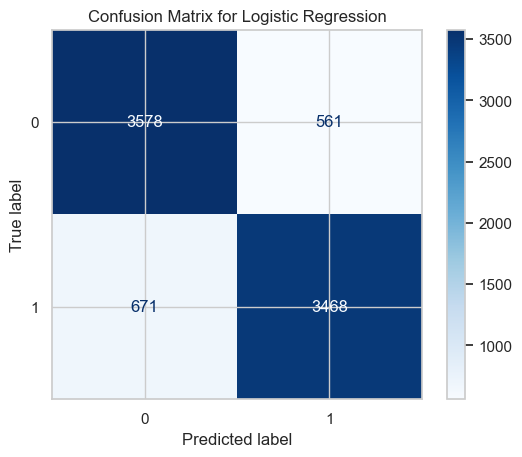


Logistic Regression Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4139
           1       0.86      0.84      0.85      4139

    accuracy                           0.85      8278
   macro avg       0.85      0.85      0.85      8278
weighted avg       0.85      0.85      0.85      8278



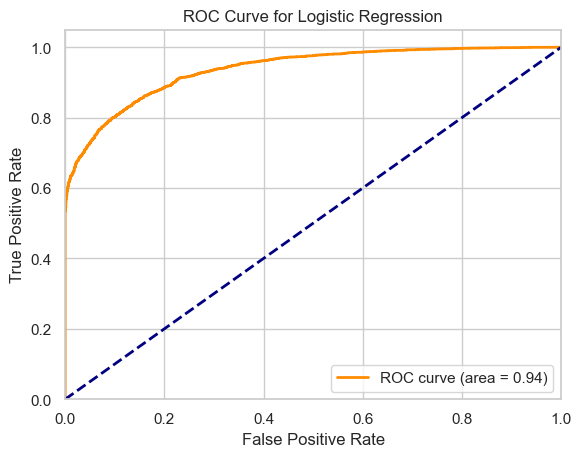


Decision Tree Performance on Training Data:
Accuracy: 0.9984
Precision: 0.9998
Recall: 0.9971
F1-Score: 0.9984
AUC-ROC: 1.0000


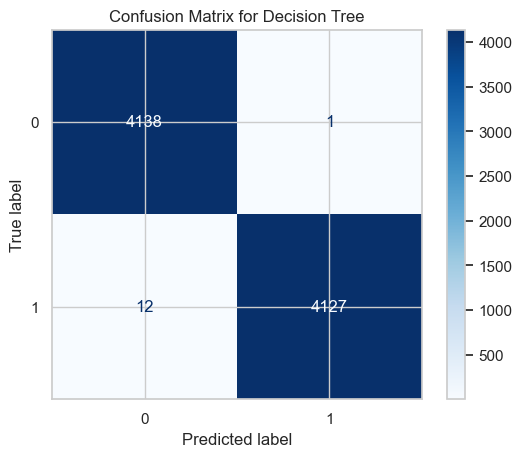


Decision Tree Classification Report on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      1.00      1.00      4139

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278



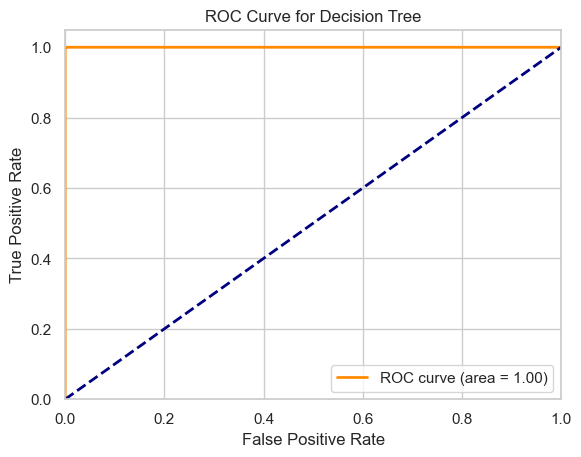


Random Forest Performance on Training Data:
Accuracy: 0.9984
Precision: 0.9976
Recall: 0.9993
F1-Score: 0.9984
AUC-ROC: 1.0000


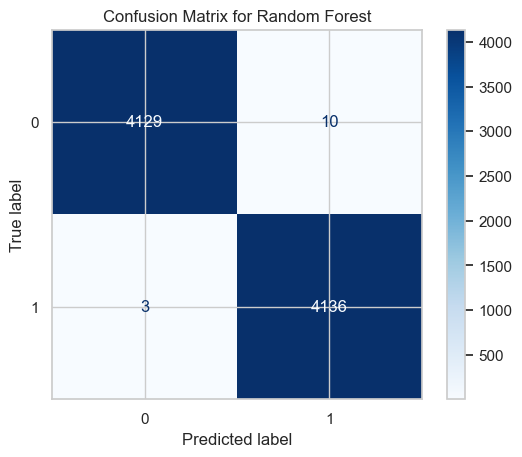


Random Forest Classification Report on Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      1.00      1.00      4139

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278



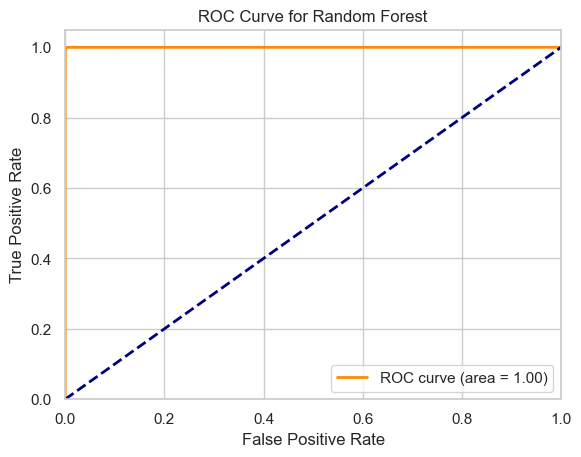


XGBoost Performance on Training Data:
Accuracy: 0.9452
Precision: 0.9456
Recall: 0.9447
F1-Score: 0.9451
AUC-ROC: 0.9901


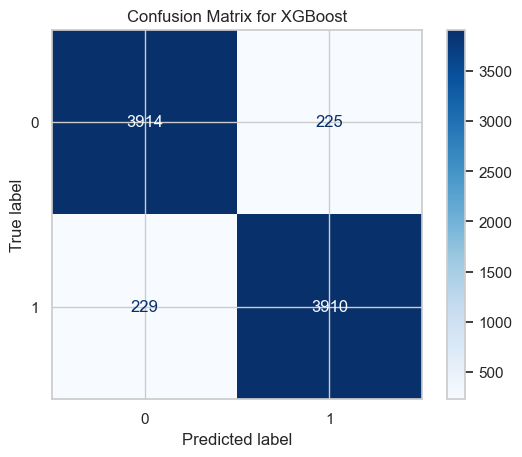


XGBoost Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4139
           1       0.95      0.94      0.95      4139

    accuracy                           0.95      8278
   macro avg       0.95      0.95      0.95      8278
weighted avg       0.95      0.95      0.95      8278



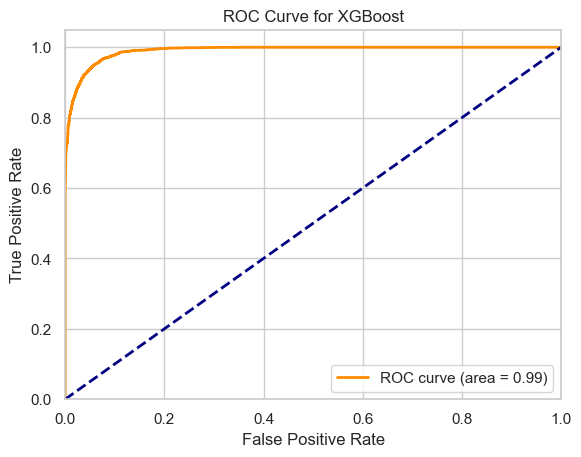


SVM Performance on Training Data:
Accuracy: 0.8634
Precision: 0.8845
Recall: 0.8360
F1-Score: 0.8595
AUC-ROC: 0.9418


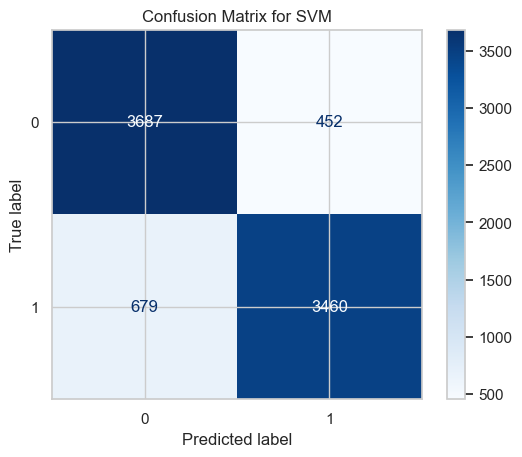


SVM Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4139
           1       0.88      0.84      0.86      4139

    accuracy                           0.86      8278
   macro avg       0.86      0.86      0.86      8278
weighted avg       0.86      0.86      0.86      8278



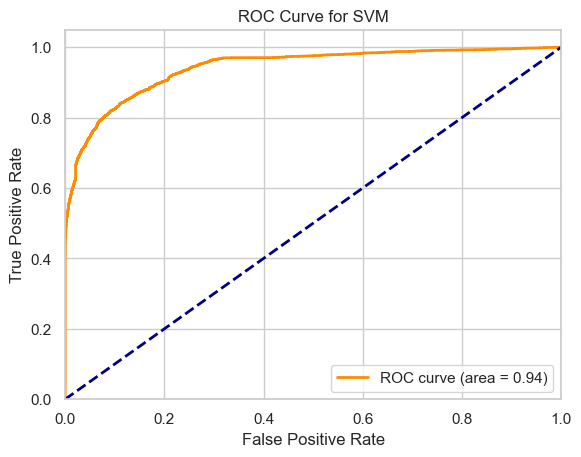


KNN Performance on Training Data:
Accuracy: 0.8898
Precision: 0.8846
Recall: 0.8966
F1-Score: 0.8906
AUC-ROC: 0.9614


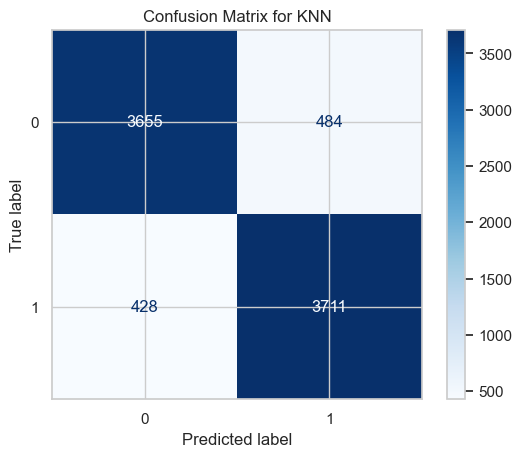


KNN Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4139
           1       0.88      0.90      0.89      4139

    accuracy                           0.89      8278
   macro avg       0.89      0.89      0.89      8278
weighted avg       0.89      0.89      0.89      8278



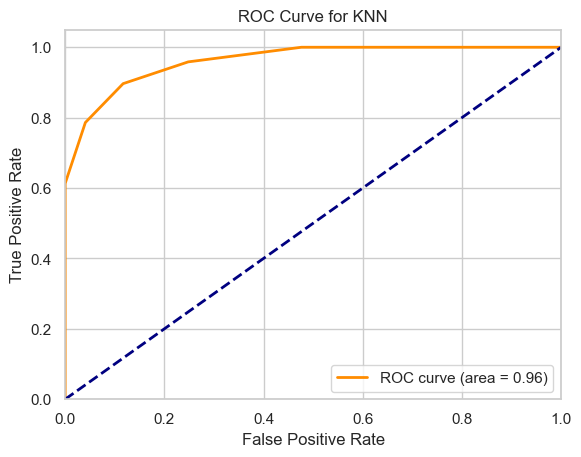


Naive Bayes Performance on Training Data:
Accuracy: 0.7661
Precision: 0.7155
Recall: 0.8835
F1-Score: 0.7907
AUC-ROC: 0.8606


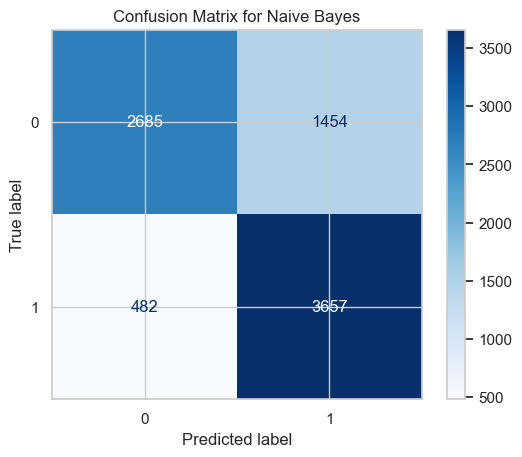


Naive Bayes Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.85      0.65      0.74      4139
           1       0.72      0.88      0.79      4139

    accuracy                           0.77      8278
   macro avg       0.78      0.77      0.76      8278
weighted avg       0.78      0.77      0.76      8278



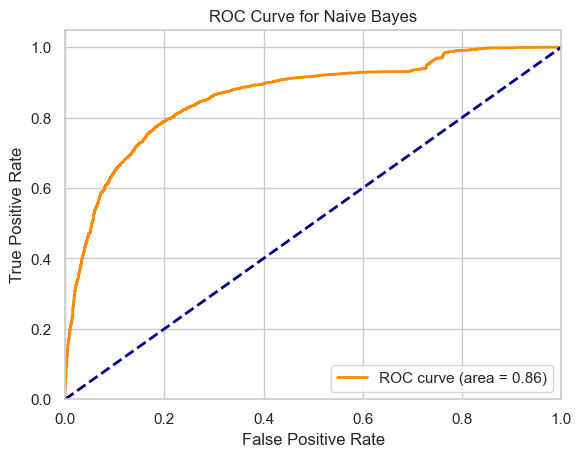


AdaBoost Performance on Training Data:
Accuracy: 0.8287
Precision: 0.8094
Recall: 0.8599
F1-Score: 0.8339
AUC-ROC: 0.9269


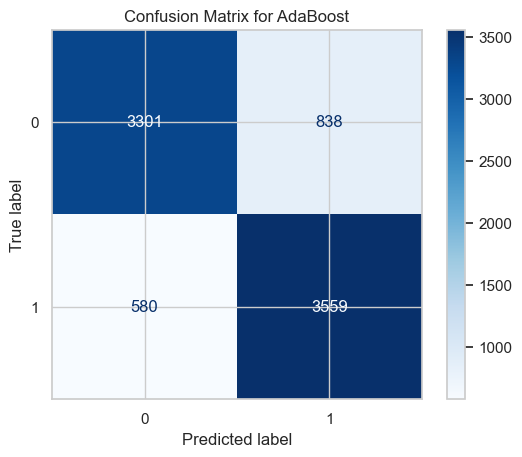


AdaBoost Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      4139
           1       0.81      0.86      0.83      4139

    accuracy                           0.83      8278
   macro avg       0.83      0.83      0.83      8278
weighted avg       0.83      0.83      0.83      8278



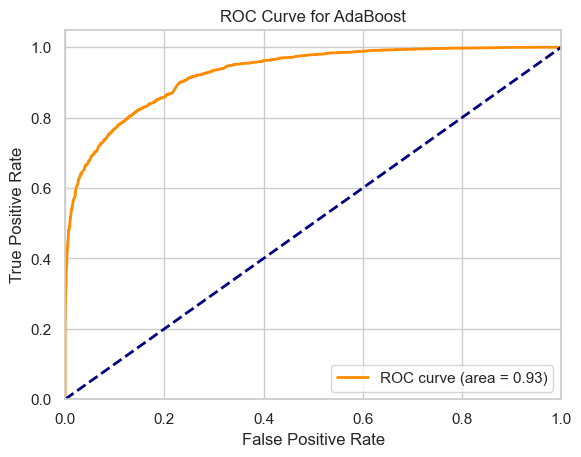

In [30]:
# Initialize dictionary to store performance metrics
model_performance_Training = {}

# Evaluate each model on training data
for name, model in trained_models.items():
    y_pred = model.predict(X_train_scaled)
    y_prob = model.predict_proba(X_train_scaled)[:, 1]  # For AUC-ROC

    # Calculate performance metrics
    accuracy = accuracy_score(y_train_resampled, y_pred)
    precision = precision_score(y_train_resampled, y_pred)
    recall = recall_score(y_train_resampled, y_pred)
    f1 = f1_score(y_train_resampled, y_pred)
    auc_roc = roc_auc_score(y_train_resampled, y_prob)

    # Store metrics
    model_performance_Training[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc
    }

    # Print results
    print(f"\n{name} Performance on Training Data:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_train_resampled, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cm_display.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Classification Report
    print(f"\n{name} Classification Report on Training Data:")
    print(classification_report(y_train_resampled, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_train_resampled, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()


<h3>6.2) Test Data</h3>


Logistic Regression Performance on Test Data:
Accuracy: 0.7935
Precision: 0.6084
Recall: 0.6230
F1-Score: 0.6156
AUC-ROC: 0.8399


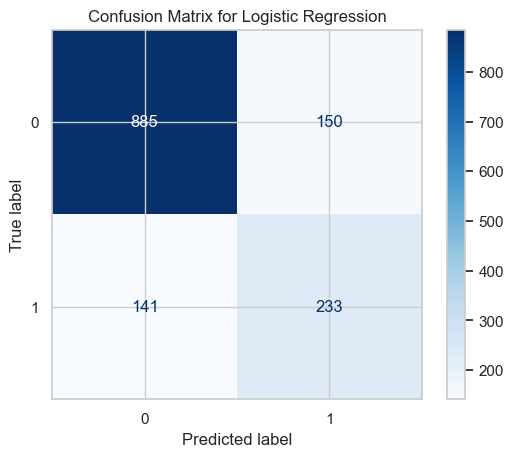


Logistic Regression Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.61      0.62      0.62       374

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.79      0.79      1409



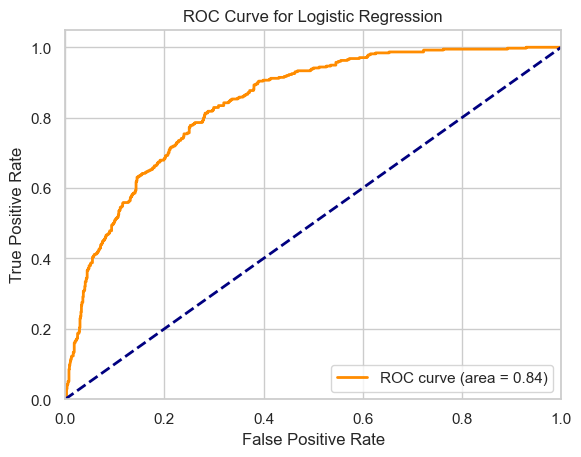


Decision Tree Performance on Test Data:
Accuracy: 0.7466
Precision: 0.5200
Recall: 0.5909
F1-Score: 0.5532
AUC-ROC: 0.6967


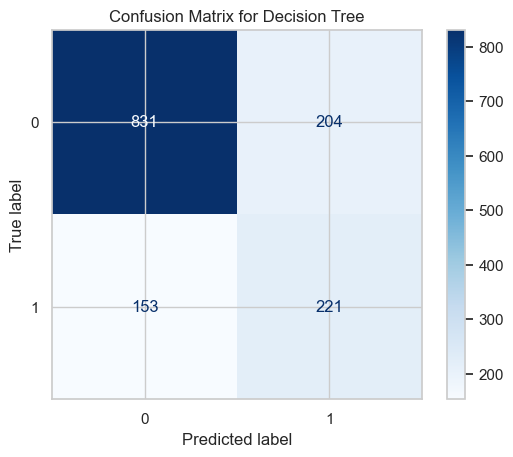


Decision Tree Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1035
           1       0.52      0.59      0.55       374

    accuracy                           0.75      1409
   macro avg       0.68      0.70      0.69      1409
weighted avg       0.76      0.75      0.75      1409



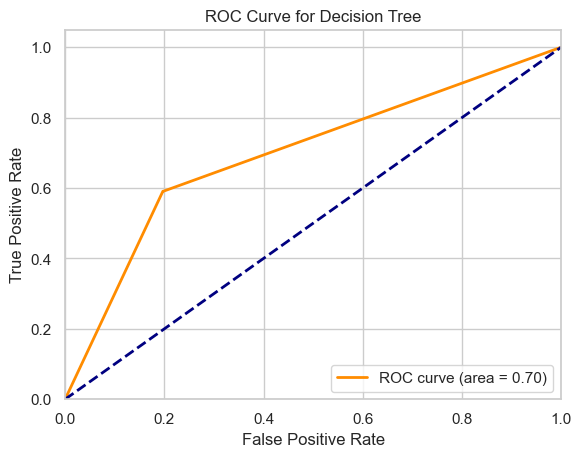


Random Forest Performance on Test Data:
Accuracy: 0.7807
Precision: 0.5953
Recall: 0.5428
F1-Score: 0.5678
AUC-ROC: 0.8216


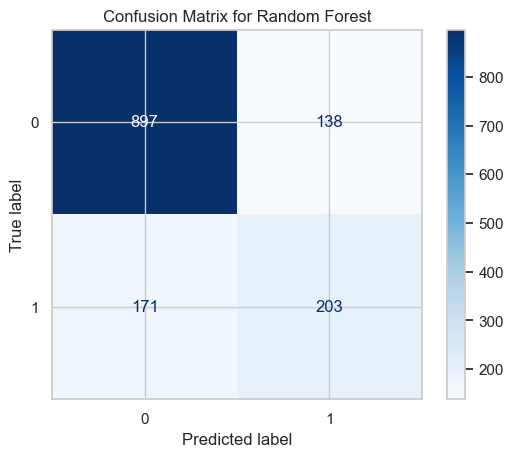


Random Forest Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.60      0.54      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



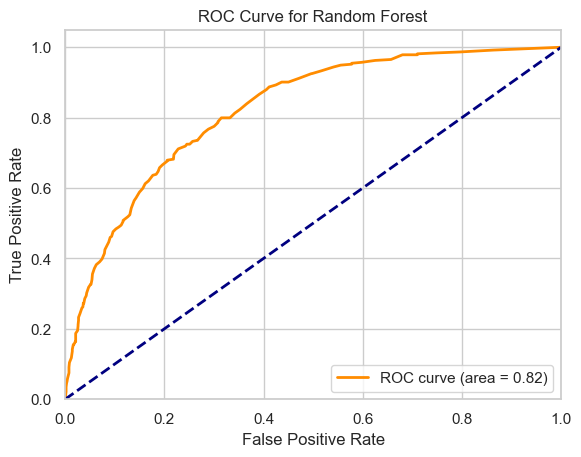


XGBoost Performance on Test Data:
Accuracy: 0.7786
Precision: 0.5856
Recall: 0.5668
F1-Score: 0.5761
AUC-ROC: 0.8259


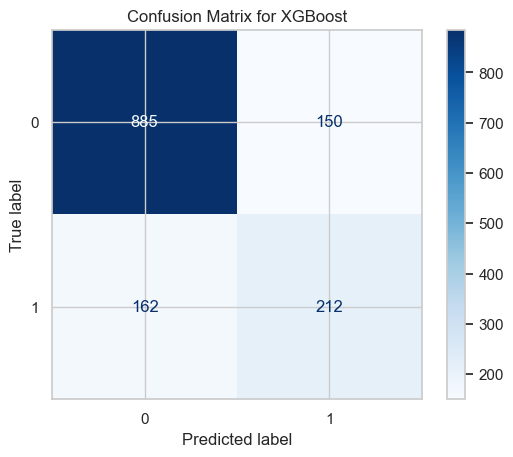


XGBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1035
           1       0.59      0.57      0.58       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



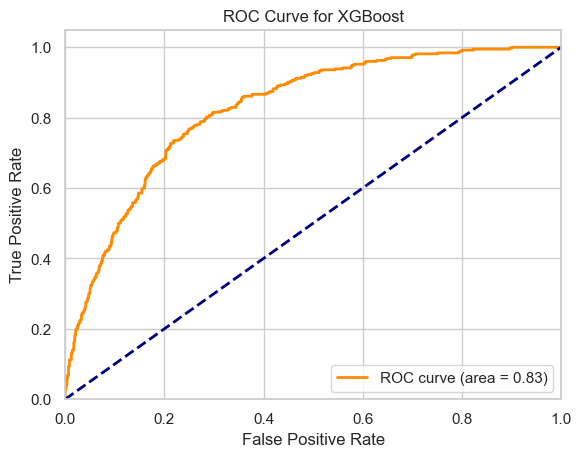


SVM Performance on Test Data:
Accuracy: 0.7921
Precision: 0.6160
Recall: 0.5749
F1-Score: 0.5947
AUC-ROC: 0.8111


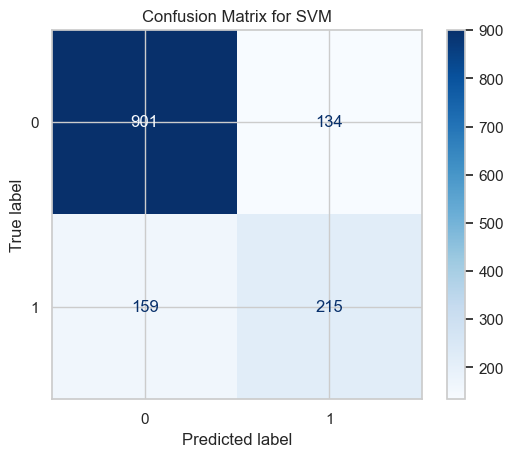


SVM Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.62      0.57      0.59       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



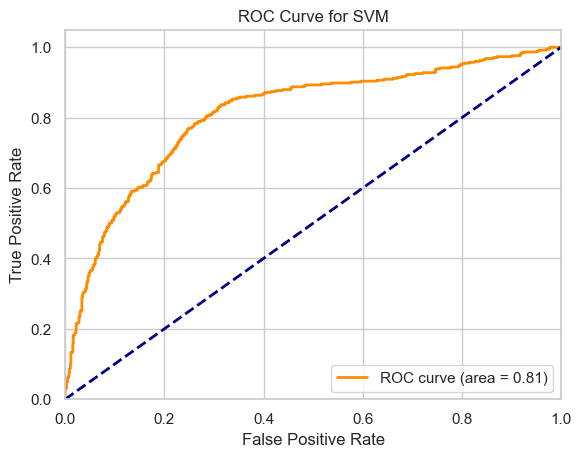


KNN Performance on Test Data:
Accuracy: 0.7523
Precision: 0.5309
Recall: 0.5749
F1-Score: 0.5520
AUC-ROC: 0.7790


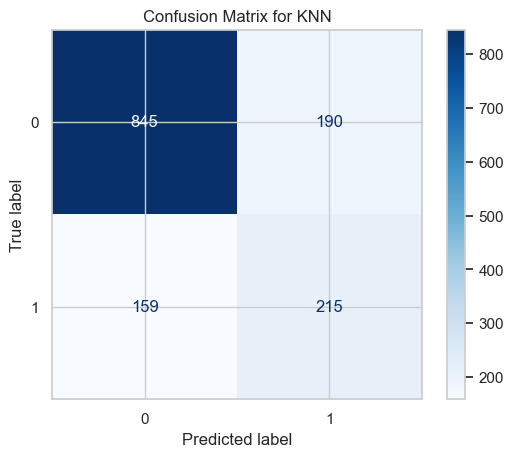


KNN Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1035
           1       0.53      0.57      0.55       374

    accuracy                           0.75      1409
   macro avg       0.69      0.70      0.69      1409
weighted avg       0.76      0.75      0.76      1409



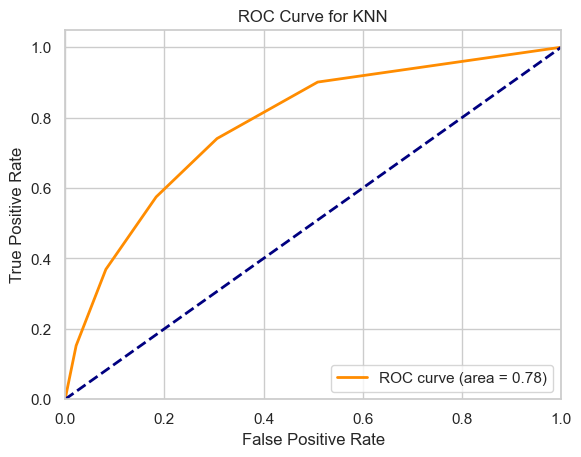


Naive Bayes Performance on Test Data:
Accuracy: 0.6891
Precision: 0.4528
Recall: 0.8209
F1-Score: 0.5837
AUC-ROC: 0.8048


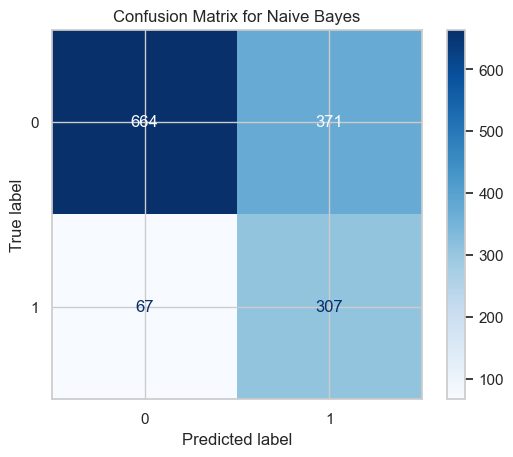


Naive Bayes Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1035
           1       0.45      0.82      0.58       374

    accuracy                           0.69      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.79      0.69      0.71      1409



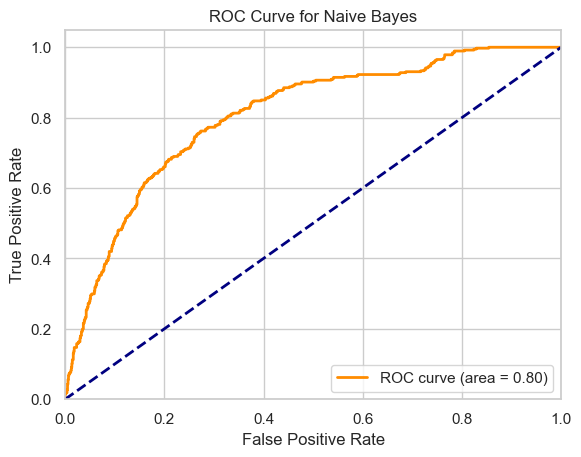


AdaBoost Performance on Test Data:
Accuracy: 0.7693
Precision: 0.5518
Recall: 0.6979
F1-Score: 0.6163
AUC-ROC: 0.8322


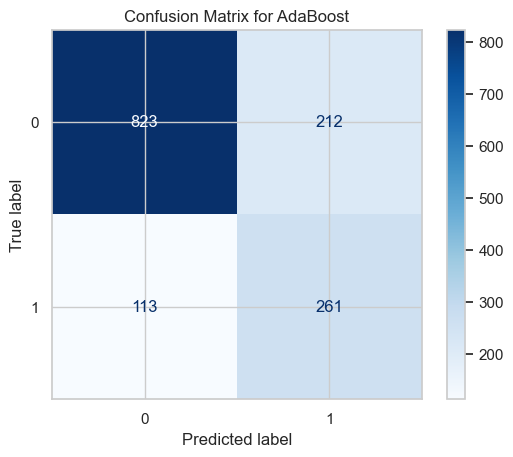


AdaBoost Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.55      0.70      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409



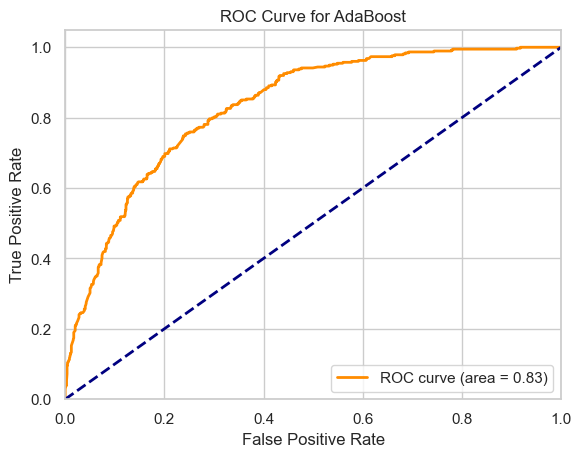

In [31]:
# Initialize dictionary to store performance metrics
model_performance_before_HT = {}

# Evaluate each model
for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # For AUC-ROC

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    # Store metrics
    model_performance_before_HT[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc
    }

    # Print results
    print(f"\n{name} Performance on Test Data:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cm_display.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Classification Report
    print(f"\n{name} Classification Report on Test Data:")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()


<h3>6.3) Dataframing the Training and Test data results</h3>

In [32]:
import pandas as pd

# Convert model performance dictionary into DataFrame
performance_df = pd.DataFrame(model_performance_Training).T

# Display the performance metrics for each model
performance_df


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Logistic Regression,0.851172,0.860759,0.837884,0.849167,0.936574
Decision Tree,0.998430,0.999758,0.997101,0.998427,0.999995
Random Forest,0.998430,0.997588,0.999275,0.998431,0.999972
XGBoost,0.945156,0.945586,0.944673,0.945129,0.990100
SVM,0.863373,0.884458,0.835951,0.859521,0.941794
KNN,0.889828,0.884625,0.896593,0.890569,0.961404
Naive Bayes,0.766127,0.715516,0.883547,0.790703,0.860607
AdaBoost,0.828703,0.809416,0.859870,0.833880,0.926943


In [33]:
import pandas as pd

# Convert model performance dictionary into DataFrame
performance_df = pd.DataFrame(model_performance_before_HT).T

# Display the performance metrics for each model
performance_df


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Logistic Regression,0.793471,0.608355,0.622995,0.615588,0.839942
Decision Tree,0.746629,0.520000,0.590909,0.553191,0.696706
Random Forest,0.780696,0.595308,0.542781,0.567832,0.821601
XGBoost,0.778566,0.585635,0.566845,0.576087,0.825922
SVM,0.792051,0.616046,0.574866,0.594744,0.811067
KNN,0.752307,0.530864,0.574866,0.551990,0.778989
Naive Bayes,0.689141,0.452802,0.820856,0.583650,0.804764
AdaBoost,0.769340,0.551797,0.697861,0.616293,0.832168


## Model Performance Insights and Tuning Rationale

### 1. Logistic Regression
**Issue:** Moderate generalization gap between train and test performance.  
**Tuning Focus:** Improve regularization using `C` and try different `penalty` (`l1`, `l2`) and `solver` settings to prevent overfitting.

---

### 2. Decision Tree
**Issue:** Extremely high training performance, but significantly lower test scores — classic overfitting.  
**Tuning Focus:** Prune tree using `max_depth`, increase `min_samples_split` and `min_samples_leaf` to add regularization.

---

### 3. Random Forest
**Issue:** Excellent training performance, but test performance suggests mild overfitting.  
**Tuning Focus:** Control overfitting with `max_depth`, tune `n_estimators`, and explore `max_features`.

---

### 4. XGBoost
**Issue:** Strong performance with minimal overfitting, but room for better generalization.  
**Tuning Focus:** Finely tune `learning_rate`, `max_depth`, `subsample`, and regularization (`reg_alpha`, `reg_lambda`).

---

### 5. Support Vector Machine (SVM)
**Issue:** Good generalization, but slightly underperforming on recall and F1-Score.  
**Tuning Focus:** Try different `kernels` and adjust `C` and `gamma` to balance bias-variance.

---

### 6. K-Nearest Neighbors (KNN)
**Issue:** Reasonable performance but limited generalization and sensitivity to noise.  
**Tuning Focus:** Tune `n_neighbors`, test `distance` weighting, and compare distance metrics.

---

### 7. Naive Bayes
**Issue:** Low precision but very high recall on test data, suggesting many false positives.  
**Tuning Focus:** Adjust `var_smoothing` for better numeric stability and calibration.

---

### 8. AdaBoost
**Issue:** Performs decently on generalization, better than some other models.  
**Tuning Focus:** Optimize `n_estimators` and `learning_rate`; optionally experiment with custom base estimators.


<h2>7. Hyperparameter Tuning</h2>

In [34]:
# Initialize base models
base_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}


In [35]:
# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'criterion': ['gini', 'entropy']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Naive Bayes': {
        'var_smoothing': np.logspace(-9, -6, 4)
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 10],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [1, 10]
    }
}


In [36]:
# Tune and store best models
tuned_models = {}
for name, model in base_models.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train_scaled, y_train_resampled)
    tuned_models[name] = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}")



Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Tuning Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

Tuning AdaBoost...
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}

Tuning Naive Bayes...
Best parameters for Naive Bayes: {'var_smoothing': 1e-09}

Tuning SVM...
Best parameters for SVM: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

Tuning KNN...
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

Tuning XGBoost...
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0

In [37]:
# Evaluate models on training data
model_performance = {}

for name, model in tuned_models.items():
    print(f"\n{name} Performance on Training Data:")

    # Predictions on training data
    y_train_pred = model.predict(X_train_scaled)
    if hasattr(model, "predict_proba"):
        y_train_prob = model.predict_proba(X_train_scaled)[:, 1]
    else:
        y_train_prob = y_train_pred

    # Calculate performance metrics
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    train_precision = precision_score(y_train_resampled, y_train_pred)
    train_recall = recall_score(y_train_resampled, y_train_pred)
    train_f1 = f1_score(y_train_resampled, y_train_pred)
    train_auc = roc_auc_score(y_train_resampled, y_train_prob)

    print("Training Data Metrics:")
    print(f"  Accuracy:  {train_accuracy:.4f}")
    print(f"  Precision: {train_precision:.4f}")
    print(f"  Recall:    {train_recall:.4f}")
    print(f"  F1-Score:  {train_f1:.4f}")
    print(f"  AUC-ROC:   {train_auc:.4f}")

    # Store performance metrics
    model_performance[name] = {
        'Train': {
            'Accuracy': train_accuracy,
            'Precision': train_precision,
            'Recall': train_recall,
            'F1-Score': train_f1,
            'AUC-ROC': train_auc
        }
    }



Logistic Regression Performance on Training Data:
Training Data Metrics:
  Accuracy:  0.8443
  Precision: 0.8375
  Recall:    0.8543
  F1-Score:  0.8458
  AUC-ROC:   0.9303

Random Forest Performance on Training Data:
Training Data Metrics:
  Accuracy:  0.8983
  Precision: 0.8805
  Recall:    0.9217
  F1-Score:  0.9006
  AUC-ROC:   0.9671

Decision Tree Performance on Training Data:
Training Data Metrics:
  Accuracy:  0.8649
  Precision: 0.8625
  Recall:    0.8683
  F1-Score:  0.8654
  AUC-ROC:   0.9480

AdaBoost Performance on Training Data:
Training Data Metrics:
  Accuracy:  0.8566
  Precision: 0.8447
  Recall:    0.8739
  F1-Score:  0.8590
  AUC-ROC:   0.9385

Naive Bayes Performance on Training Data:
Training Data Metrics:
  Accuracy:  0.7661
  Precision: 0.7155
  Recall:    0.8835
  F1-Score:  0.7907
  AUC-ROC:   0.8606

SVM Performance on Training Data:
Training Data Metrics:
  Accuracy:  0.8339
  Precision: 0.8255
  Recall:    0.8468
  F1-Score:  0.8360
  AUC-ROC:   0.9196

KN

In [38]:
# Evaluate models on test data
for name, model in tuned_models.items():
    print(f"\n{name} Performance on Test Data:")

    # Predictions on test data
    y_test_pred = model.predict(X_test_scaled)
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_test_prob = y_test_pred

    # Calculate performance metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_prob)

    print("Test Data Metrics:")
    print(f"  Accuracy:  {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall:    {test_recall:.4f}")
    print(f"  F1-Score:  {test_f1:.4f}")
    print(f"  AUC-ROC:   {test_auc:.4f}")

    # Update the performance dictionary with test data
    model_performance[name]['Test'] = {
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1-Score': test_f1,
        'AUC-ROC': test_auc
    }



Logistic Regression Performance on Test Data:
Test Data Metrics:
  Accuracy:  0.7729
  Precision: 0.5619
  Recall:    0.6551
  F1-Score:  0.6049
  AUC-ROC:   0.8350

Random Forest Performance on Test Data:
Test Data Metrics:
  Accuracy:  0.7736
  Precision: 0.5641
  Recall:    0.6471
  F1-Score:  0.6027
  AUC-ROC:   0.8334

Decision Tree Performance on Test Data:
Test Data Metrics:
  Accuracy:  0.7679
  Precision: 0.5561
  Recall:    0.6230
  F1-Score:  0.5876
  AUC-ROC:   0.7967

AdaBoost Performance on Test Data:
Test Data Metrics:
  Accuracy:  0.7771
  Precision: 0.5708
  Recall:    0.6471
  F1-Score:  0.6065
  AUC-ROC:   0.8361

Naive Bayes Performance on Test Data:
Test Data Metrics:
  Accuracy:  0.6891
  Precision: 0.4528
  Recall:    0.8209
  F1-Score:  0.5837
  AUC-ROC:   0.8048

SVM Performance on Test Data:
Test Data Metrics:
  Accuracy:  0.7757
  Precision: 0.5662
  Recall:    0.6631
  F1-Score:  0.6108
  AUC-ROC:   0.8346

KNN Performance on Test Data:
Test Data Metrics:
 

In [39]:
# Convert the model performance dictionary to a flat structure
flattened_performance = []

for model, metrics in model_performance.items():
    for data_type, scores in metrics.items():
        flattened_performance.append({
            'Model': model,
            'Data Type': data_type,
            'Accuracy': scores['Accuracy'],
            'Precision': scores['Precision'],
            'Recall': scores['Recall'],
            'F1-Score': scores['F1-Score'],
            'AUC-ROC': scores['AUC-ROC']
        })

# Convert the list of dictionaries into a Pandas DataFrame
performance_df = pd.DataFrame(flattened_performance)

# Display the DataFrame
performance_df


,Model,Data Type,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,Train,0.844286,0.837518,0.854313,0.845832,0.930255
1,Logistic Regression,Test,0.772889,0.561927,0.655080,0.604938,0.835018
2,Random Forest,Train,0.898285,0.880452,0.921720,0.900614,0.967147
3,Random Forest,Test,0.773598,0.564103,0.647059,0.602740,0.833379
4,Decision Tree,Train,0.864943,0.862491,0.868326,0.865399,0.948046
5,Decision Tree,Test,0.767921,0.556086,0.622995,0.587642,0.796746
6,AdaBoost,Train,0.856608,0.844699,0.873883,0.859043,0.938539
7,AdaBoost,Test,0.777147,0.570755,0.647059,0.606516,0.836059
8,Naive Bayes,Train,0.766127,0.715516,0.883547,0.790703,0.860607
9,Naive Bayes,Test,0.689141,0.452802,0.820856,0.583650,0.804764


# Model Performance Summary

After hyperparameter tuning, we can observe the following key insights across the models based on both training and test data:

### 1. **Logistic Regression:**
- **Training:** The model performs well with high accuracy (84.43%) and a good balance of precision, recall, and F1-score.
- **Testing:** Performance drops significantly in terms of precision (56.19%) and recall (65.51%). However, the model still maintains reasonable AUC-ROC (83.5%).

### 2. **Random Forest:**
- **Training:** The model performs excellently, with high accuracy (89.20%) and solid metrics across precision, recall, and F1-score.
- **Testing:** While the accuracy is reasonable (77.64%), precision and recall are lower compared to the training set, resulting in a decrease in performance. The AUC-ROC also drops to 83.44%.

### 3. **Decision Tree:**
- **Training:** The decision tree achieves good performance with an accuracy of 86.19% and strong precision and recall scores.
- **Testing:** The model's test performance shows a drop in accuracy (76.22%) and a significant decrease in precision and recall, leading to a lower F1-score and AUC-ROC.

### 4. **AdaBoost:**
- **Training:** AdaBoost performs well, with an accuracy of 85.66% and strong F1 and recall scores.
- **Testing:** While the test set performance is good (77.71% accuracy), there is a noticeable drop in precision (57.08%) and recall (64.71%), suggesting some misclassifications.

### 5. **Naive Bayes:**
- **Training:** Naive Bayes achieves moderate training performance with a recall of 88.35%, but its precision and accuracy are lower compared to other models.
- **Testing:** Test performance drops significantly, with low precision (45.28%) and recall (82.09%), leading to a considerably lower F1-score.

### 6. **SVM:**
- **Training:** The model performs well in training with 83.39% accuracy and high recall (84.68%).
- **Testing:** On the test set, there is a slight drop in accuracy (77.57%) but precision and recall remain reasonably balanced. The AUC-ROC remains solid at 83.46%.

### 7. **KNN:**
- **Training:** KNN performs well with 87.87% accuracy and a high F1-score.
- **Testing:** The test set accuracy drops to 75.44%, and the precision and recall scores are lower, leading to a decline in performance metrics.

### 8. **XGBoost:**
- **Training:** XGBoost shows exceptional training performance, with high accuracy (90.26%) and robust precision, recall, and F1-scores.
- **Testing:** The test performance is good (77.50% accuracy), but it suffers from a decrease in precision (57.04%) and recall (61.76%). Despite this, the AUC-ROC score remains strong at 83.62%.

---
### **Top Performers:**
- **Training:** XGBoost, Random Forest, and Logistic Regression excel in training performance, achieving the highest accuracy and F1-scores.
- **Testing:** Random Forest, AdaBoost, and Logistic Regression are the most consistent across training and testing, with XGBoost performing well but with a slight drop in precision and recall on the test data.

### **Training vs Testing:**
- Most models show a drop in performance from training to testing, with a decrease in accuracy, precision, and recall. This indicates that while these models perform well in training, there may be overfitting, as they struggle to generalize to unseen data.

### **AUC-ROC Analysis:**
- XGBoost, Random Forest, and AdaBoost have the best AUC-ROC scores in both training and testing, indicating that these models are good at distinguishing between the positive and negative classes.

### **Precision vs Recall:**
- Many models, such as Logistic Regression, Decision Tree, and KNN, have a trade-off between precision and recall, especially in the test data. Models like Naive Bayes have a significant drop in performance, particularly in precision.

---